In [ ]:
import torch

import torch.nn as nn

import numpy as np

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
nPerClust = 100  # number of points per cluster
blur = 1         # standard deviation of the Gaussian noise added to each cluster

A = [1, 1]       # coordinates of center of cluster A
B = [5, 1]       # coordinates of center of cluster B

# generate data for each cluster
a = [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]


In [ ]:
# create labels for the data
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatenate into a matrix
data_np = np.hstack((a,b)).T

# convert to a PyTorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

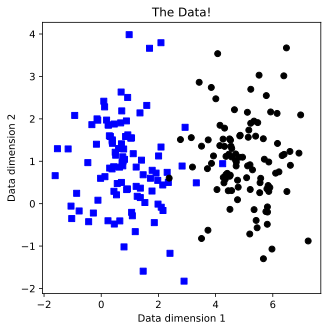

In [ ]:
fig = plt.figure(figsize=(5,5))   # Create a new figure

# Plot the data points with label 0 in blue squares
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')

# Plot the data points with label 1 in black circles
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')

plt.title('The Data!')   # Set the title of the plot

plt.xlabel('Data dimension 1')   # Label the x-axis

plt.ylabel('Data dimension 2')   # Label the y-axis

plt.show()   # Display the plot


In [ ]:

# inspect types
print (type(data_np))
print (np.shape(data_np))
print(' ')
print (type(data) )
print (np. shape(data) )


<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [ ]:
# build the model
ANNclassify = nn.Sequential(

nn.Linear(2,1), # input Layer

nn.ReLU(), # activation unit

nn.Linear(1,1), # output unit

nn.Sigmoid(), # final activation unit (here for conceptual reasons; in pra

)
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
# other model features
learningRate = .01

# Loss function

lossfun = nn.BCELoss()
# Note: You'll Learn in the "Metaparameters" section that it's better to use BCEWi

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)
#torch.optim.SGD() is the stochastic gradient descent optimizer that updates the model parameters based on the gradient of the loss 
#with respect to the parameters. The optimizer takes the model parameters and the learning rate as input.



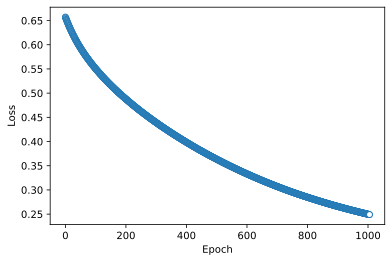

In [ ]:
# train the model
numepochs = 1006
losses = torch.zeros(numepochs )

for epochi in range(numepochs):
  # forward pass
  yHat = ANNclassify(data)

  # compute Loss
  loss = lossfun(yHat, labels)
  losses[epochi] = loss
  
  # backprop
  optimizer.zero_grad()
  loss .backward()
  optimizer .step()
  
  
# show the Losses

plt.plot(losses.detach(), 'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch' )

plt.ylabel('Loss')

plt.show()



In [ ]:
# compute the predictions

# manually compute Losses

# final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)


Final accuracy: 94.5%


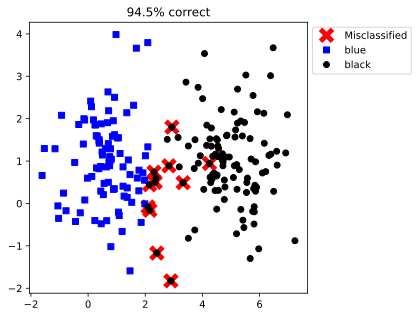

In [ ]:
# plot the Labeled data

fig = plt.figure(figsize=(5,5))

plt.plot(data[misclassified,0] ,data[misclassified,1], 'rx' ,markersize=12,markeredgewidth=5)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified', 'blue', 'black'],bbox_to_anchor=(1,1))

plt.title(f'{totalacc}% correct')
plt.show()
